### ※ 문제56. 원형 그래프를 조금 더 고급스럽게 그리시오!

In [1]:
!pip install plotly

  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11435 sha256=3d6b010b3176d5d7f8fbc4a22f52198abdc9067ce4ed2e73a1fd5d56e770040e
  Stored in directory: c:\users\knitwill\appdata\local\pip\cache\wheels\f9\8d\8d\f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [3]:
import pandas as pd
pf = pd.read_csv('PatientInfo.csv')

grouped = pf.groupby('sex')['patient_id'].count().reset_index()
grouped

,sex,patient_id
0,female,2218
1,male,1825


In [6]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
import pandas as pd
from plotly.subplots import make_subplots
plt.rcParams["figure.figsize"] = (15,10)
plt.rcParams.update({'font.size': 22})

trace = go.Pie(labels=grouped['sex'], values=grouped['patient_id'], pull=[0.05,0],marker=dict(colors=['brown','cornflowerblue']))
layout = go.Layout(title=" ",height=400,legend=dict(x=0.1,y=1.1))
fig = go.Figure(data = [trace],layout=layout)
iplot(fig)

### ※ 문제57. 나이대, 나이대별 코로나 환자수를 출력하시오

In [13]:
import pandas as pd
pf = pd.read_csv('PatientInfo.csv')
pf_g = pf.groupby('age')['patient_id'].count()
pf_df = pd.DataFrame({'age':pf_g.index,'count':pf_g.values})
pf_df

,age,count
0,0s,66
1,100s,1
2,10s,178
3,20s,899
4,30s,523
5,40s,518
6,50s,667
7,60s,482
8,70s,232
9,80s,170


### ※ 문제58. 위의 결과를 막대그래프로 그리시오

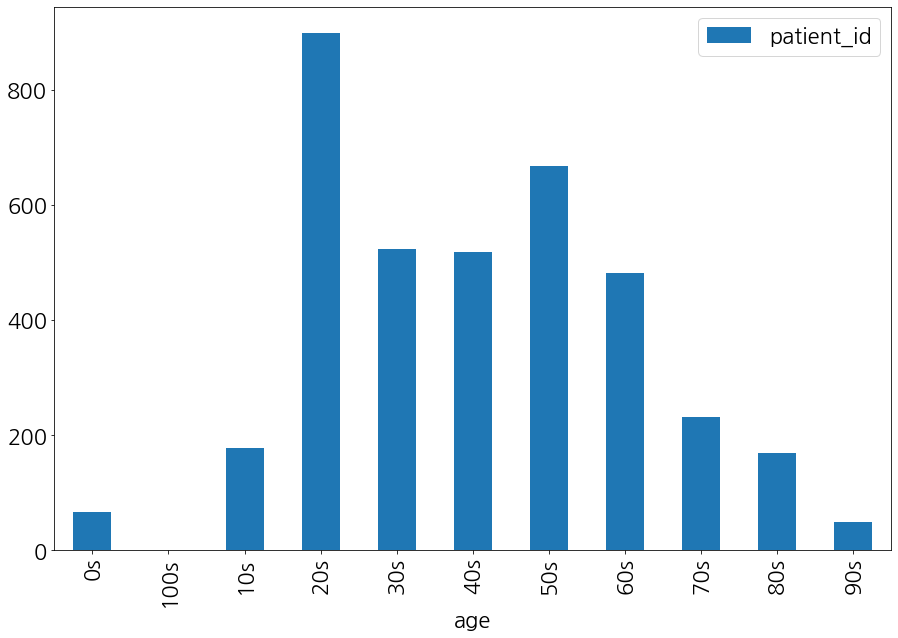

In [25]:
pf_g = pf.groupby('age')['patient_id'].count().reset_index()
pf_g.index = pf_g.age
pf_g.plot.bar()

### ※ 문제59. 위의 결과를 plotly 막대 그래프로도 그리시오

In [26]:
grouped = pf.groupby('age')['patient_id'].count().reset_index()
bar1 = go.Bar(x=grouped['age'],y=grouped['patient_id'],marker=dict(color='brown'))
layout = go.Layout(title="막대그래프", legend=dict(x=0.1,y=1.1,orientation="h"))
fig = go.Figure(bar1,layout=layout)
fig.show()

## <b>■ 날씨와 확진자 발생수는 상관관계가 있을까?</b>
    - 통계 : 상관관계
    - 데이터 : weather.csv, time.csv
    
## <b>■ Pandas를 이용한 join</b>
```python
    문법
        emp = pd.read_csv('emp3.csv')
        dept = pd.read_csv('deptno.csv')
        rs = pd.merge(emp, dept, on='deptno')
        rs[['ename','loc']]
```
                                           

In [28]:
emp = pd.read_csv('emp3.csv')
dept = pd.read_csv('dept.csv')
rs = pd.merge(emp, dept, on='deptno')
rs[['ename','loc']]

,ename,loc
0,KING,NEW YORK
1,CLARK,NEW YORK
2,MILLER,NEW YORK
3,BLAKE,CHICAGO
4,MARTIN,CHICAGO
5,ALLEN,CHICAGO
6,TURNER,CHICAGO
7,JAMES,CHICAGO
8,WARD,CHICAGO
9,JONES,DALLAS


### ※ 문제60. time.csv와 weather.csv를 서로 조인해서 날짜와 평균기온과 확진자 누적수를 출력하시오

In [73]:
import pandas as pd
time = pd.read_csv('time.csv')
wt = pd.read_csv('weather.csv')
rs = pd.merge(time, wt, on='date')
rs['pcount']=rs['confirmed']-rs['released']
rs2 = rs[['date','confirmed','avg_temp','pcount']]
rs3 = rs2.groupby('date')['pcount'].sum()
rs4 = rs2.groupby('date')['avg_temp'].mean()
rs3_df = pd.DataFrame(rs3)
rs4_df = pd.DataFrame(rs4)
rs_df = pd.merge(rs3_df, rs4_df, on='date')
rs_df

,pcount,avg_temp
date,,
2020-01-20,16,3.47500
2020-01-21,16,1.89375
2020-01-22,16,4.48125
2020-01-23,16,6.31250
2020-01-24,32,5.62500
...,...,...
2020-06-25,25424,21.74375
2020-06-26,22880,23.13125
2020-06-27,21376,24.14375


### ※ 문제61. 평균온도와 확진자수와의 상관계수를 출력하시오

In [74]:
rs_df.corr(method='pearson')

,pcount,avg_temp
pcount,1.000000,-0.131376
avg_temp,-0.131376,1.000000


In [47]:
pf.groupby('confirmed_date')['patient_id'].count()

confirmed_date
2020-01-20     1
2020-01-23     1
2020-01-26     1
2020-01-27     1
2020-01-30     4
              ..
2020-06-26    40
2020-06-27    48
2020-06-28    38
2020-06-29    25
2020-06-30     7
Name: patient_id, Length: 148, dtype: int64